# (Ford Gobike Dataset Exploration)
## by (Abdallah El-Sawy)

## Preliminary Wrangling

## Briefly introduce for our dataset.

>  This data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area. Individual rides in a bike-sharing system that covers the larger San Francisco Bay region are included in this data collection. The focus of the Ford GoBike dataset is on the start time (hour, day, month) in order to determine when and by whom the bikes are in great demand. dataset containing the trip data of the ford gobike 183412 trip.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import os
import glob
%matplotlib inline

In [2]:
df = pd.read_csv('fordgobike.csv')
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

In [4]:
df.shape

(183412, 16)

In [5]:
df.dtypes

duration_sec                 int64
start_time                  object
end_time                    object
start_station_id           float64
start_station_name          object
start_station_latitude     float64
start_station_longitude    float64
end_station_id             float64
end_station_name            object
end_station_latitude       float64
end_station_longitude      float64
bike_id                      int64
user_type                   object
member_birth_year          float64
member_gender               object
bike_share_for_all_trip     object
dtype: object

In [6]:
df.duplicated().sum()

0

In [7]:
df['member_age'] = 2019-df['member_birth_year']

df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,member_age
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No,35.0
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No,NaN
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No,47.0
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No,30.0
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes,45.0


In [8]:
df.member_age.mean()


34.19356312126385

In [9]:
df['start_time'] = pd.to_datetime(df['start_time'])
df['end_time']   = pd.to_datetime(df['end_time'])

In [10]:
df['start_date']  = df.start_time.dt.strftime('%Y-%m-%d')
df['start_hour']  = df.start_time.dt.strftime('%H')
df['start_day']   = df.start_time.dt.strftime('%A')
df['start_month'] = df.start_time.dt.strftime('%B')

### What is the structure of our dataset?

> this dataset is about This data set includes information about individual rides made in a bike-sharing system.
we have ' 18412' trip in the data set.
each trip could described by 16 columns like the starttime and the end time for the trib then, the birth day of the user ,etc.
we have different variable types like (int - float - string - bool).

### What is/are the main feature(s) of interest in our dataset?

> Gender,
> Average riding duration,
> Age. 

### What features in the dataset do we think will help support our investigation into our feature(s) of interest?

> every one of the gender and age will effect on the average riding duration so that the start station and the end which affected by the city crowded or not.

## Univariate Exploration

> In this section, investigate distributions of individual variables. If
we see unusual points or outliers,we will take a deeper look to clean things up
and be prepared to look at relationships between variables.

#####  age distribution.


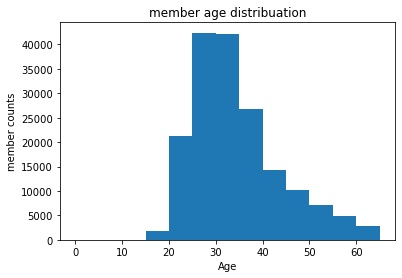

In [11]:
bin_edges = np.arange(0, 70, 5)

plt.hist(data = df, x = 'member_age', bins = bin_edges);

plt.title('member age distribuation')
plt.xlabel('Age')
plt.ylabel('member counts')
plt.show()

> it is clear that most of the riders its average age is about 34 years old

### the number of trips analysis per hour.


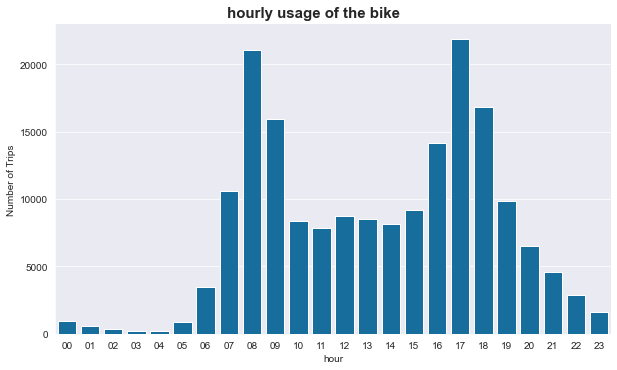

In [12]:
base_color = sb.color_palette('colorblind')[0]
sb.set_style('darkgrid')

graph = sb.catplot(data=df, x='start_hour', kind='count', sharey = False,
            color = base_color, aspect = 1.7)

graph.set_axis_labels("hour", "Number of Trips")
graph.fig.suptitle('hourly usage of the bike ', y=1.02, fontsize=15, fontweight='bold');


 > it is clear that the rush time for the riders to ride the bikes is at 8-9 am and 5-6 pm

### the number of trips analysis per day.

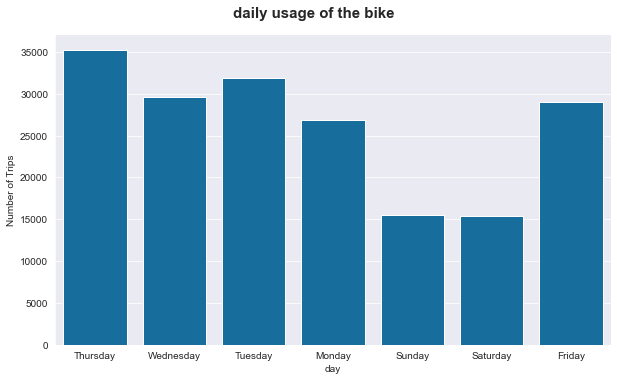

In [13]:
base_color = sb.color_palette('colorblind')[0]
sb.set_style('darkgrid')

graph = sb.catplot(data=df, x='start_day', kind='count',
            color = base_color, aspect = 1.7)

graph.set_axis_labels("day", "Number of Trips")
graph.fig.suptitle('daily usage of the bike ', y=1.05, fontsize=15, fontweight='bold');

 > it is clear that thursday and tuesday is the best day  for the riders to ride the bikes which is the days of the work and least days is sunday and saturday which is the days of the weekends.


### the number of trips analysis for user type.

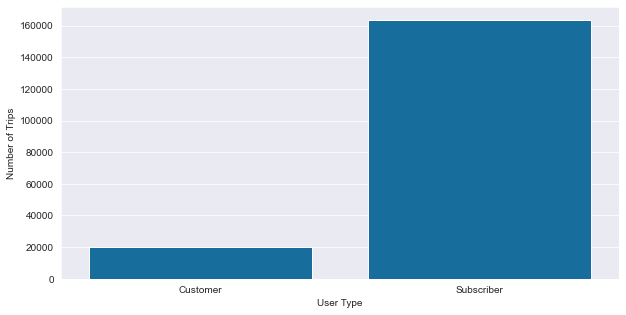

In [14]:
plt.figure(figsize = [10, 5])

sb.countplot(data=df, x='user_type', color=base_color);
plt.xlabel('User Type');
plt.ylabel('Number of Trips');

> it is clear that subscribers use the bikes regularly and much greater than customers and tha is because the subscription.

### the number of trips analysis for gender.

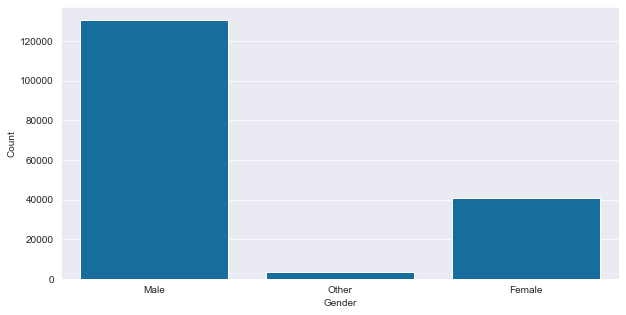

In [15]:
plt.figure(figsize = [10, 5])

sb.countplot(data=df, x='member_gender', color=base_color,);
plt.xlabel('Gender');
plt.ylabel('Count');

> it is clear that males use the bikes regularly and much greater than females.

### we should Discuss the distribution(s) of our variable(s) of interest. Were there any unusual points?and if we need to perform any transformations?

>  thursday and tuesday is the best day for the riders to ride the bikes which is workdays and least days is sunday and saturday which is the weekend days.

>we dont need to do the transformation as the dataset is straightforward.

### Of the features our investigated, were there any unusual distributions? Did we perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did we do this?

> the dataset has not any out of normal  expectations 
i have changed a little things like date to cloud sparte the hours and days.

## Bivariate Exploration

> In this section,we will investigate relationships between pairs of variables in our
data.

### Trip Duration for every Gender

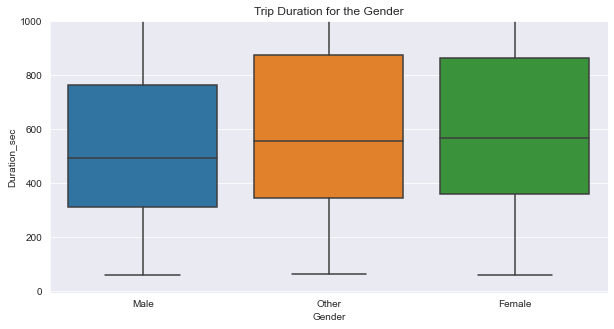

In [16]:

plt.figure(figsize = [10, 5])

sb.boxplot(data = df, x = 'member_gender', y = 'duration_sec')

plt.ylim([-5, 1000])

plt.title('Trip Duration for the Gender')
plt.xlabel('Gender')
plt.ylabel('Duration_sec')

plt.show()

> with surprising way the female when they ride the bikes the take long time than males. in other way males number for riding is greater than females

### trip duration by user type

Text(0.5, 0, 'duration(min)')

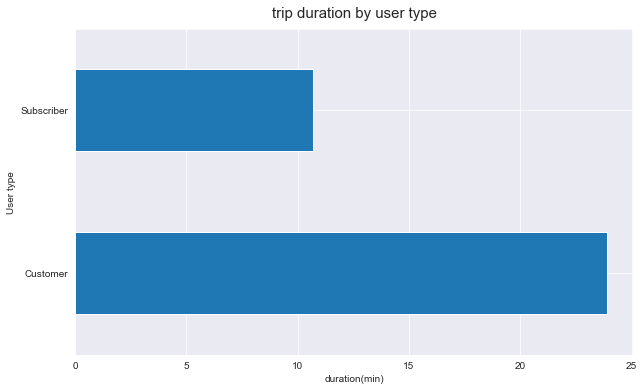

In [17]:
df['duration_min']=df['duration_sec']/60 

axis = df.groupby('user_type')['duration_min'].mean().plot(kind='barh', figsize=(10,6))

axis.set_title('trip duration by user type', fontsize=15, y=1.015)

axis.set_ylabel('User type')
axis.set_xlabel('duration(min)')

> we see that average duration in min for the users who subscribed is less than the customers by about 16 min.

### we should Discuss the distribution(s) of our variable(s) of interest. Were there any unusual points?and if we need to perform any transformations?

>  we see that average duration the customers when the use the bikes system is higher than subscribers so we should be intersted to increase those customers on the long-term.

>we dont need to do the transformation as the dataset is straightforward.

### Of the features our investigated, were there any unusual distributions? Did we perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did we do this?

> the dataset has not any out of normal  expectations.
i have changed a little things like date to cloud sparte the hours and days.

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

### Duration Per User Type and Gender

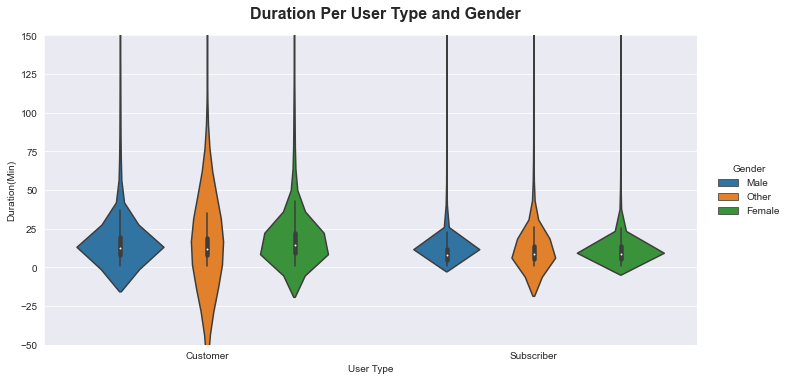

In [18]:
graph = sb.catplot(data=df, x='user_type', y="duration_min", hue="member_gender",
                   kind="violin", height=5, aspect=2);

graph.set_axis_labels("User Type", "Duration(Min)")
plt.ylim([-50, 150])

graph._legend.set_title('Gender')
graph.fig.suptitle('Duration Per User Type and Gender', y=1.05, fontsize=16, fontweight='bold');

> it is clear that the time duration for females is large than males in both customers and subscribers.

### Customers and Subscribers hourly rides during weekdays

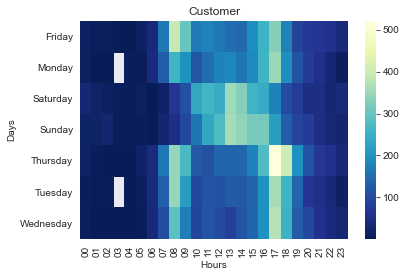

In [21]:
customers = df.query('user_type == "Customer"')

customers_counts = customers.groupby(['start_day', 'start_hour']).size()

customers_counts = customers_counts.reset_index(name='count')

customers_counts = customers_counts.pivot(index='start_day', 
                                          columns='start_hour', values='count')

sb.heatmap(customers_counts, cmap='YlGnBu_r');

plt.title('Customer');

plt.xlabel('Hours');
plt.ylabel('Days');




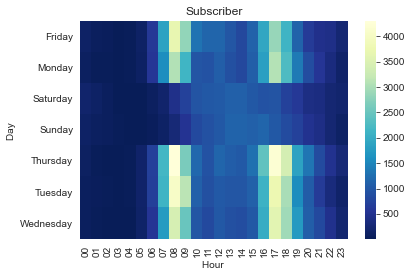

In [23]:


subscribers = df.query('user_type == "Subscriber"')

counts = subscribers.groupby(['start_day', 'start_hour']).size()

counts = counts.reset_index(name='count')

counts = counts.pivot(index='start_day', columns='start_hour', values='count')

sb.heatmap(counts, cmap='YlGnBu_r');

plt.title('Subscriber') ;

plt.xlabel('Hour ');
plt.ylabel('Day ');

> from the two heat maps we find out customers have much usage and most of it during afternon weekends but in other hand subscribers have much usage during the rest of the week during the moring and at the end of the day.

###  the relationships  observed in this part of the investigation.

>by using Multivariate Exploration it give us the ability to observe new relationships between different variables that we didn't realize before like that we saw the strong relationship between the customers usage during the week and the weekends which take us to the fact that customers using the bikes at most for Hiking. 

### Were there any interesting or surprising interactions between features?

> we did not find some thing that we did not expected here the females have much duration time in both types customers and subscribers..